In [4]:
import pandas as pd

# Upload manual (compatível com Google Colab e outros notebooks)
from IPython.display import display
from google.colab import files

print("Faça o upload do arquivo CSV contendo os dados.")
uploaded = files.upload()

# Carregar o arquivo selecionado
for file_name in uploaded.keys():
    data = pd.read_csv(file_name)
    print(f"Dados carregados com sucesso do arquivo: {file_name}")
    print(data.head())


Faça o upload do arquivo CSV contendo os dados.


Saving Analysis.csv to Analysis.csv
Dados carregados com sucesso do arquivo: Analysis.csv
   Unnamed: 0                 Genotypes  PruningBiomass  TimeofBudbrust  \
0           0  (Gulabi X B’lore Purple)        0.327667        9.000000   
1           1                     Alden        2.137667       10.000000   
2           2                     Aledo        0.912667       10.666667   
3           3               Amber Sweet        0.528667       10.000000   
4           4               Arka Chitra        1.075667       10.000000   

   Timeoffullbloom  Time of verasion         ABW          BW         BD  \
0        38.333333        105.000000  558.676667  104.800000  16.900000   
1        35.333333        102.666667  262.866667  182.776667  15.523333   
2        39.666667        109.000000  124.340000  176.866667  21.333333   
3        36.333333         99.333333   85.626667  137.363333  15.166667   
4        35.000000        102.666667  317.273333  237.713333  18.766667   

        

**Gerar Boxplots para Outliers:**

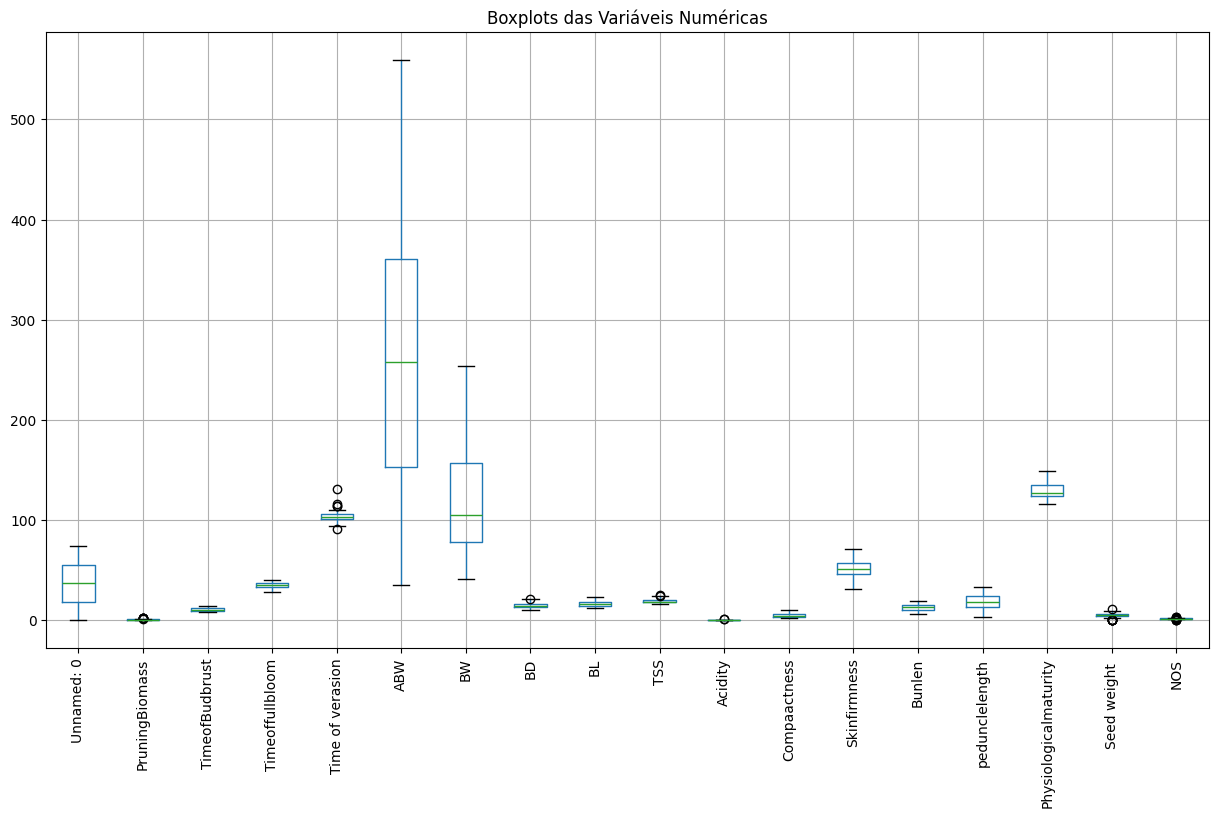

In [5]:
import matplotlib.pyplot as plt

# Boxplot para todas as variáveis numéricas
plt.figure(figsize=(15, 8))
data.select_dtypes(include=['float64', 'int64']).boxplot()
plt.title('Boxplots das Variáveis Numéricas')
plt.xticks(rotation=90)
plt.show()


**Histograma/Densidade para Distribuições:**

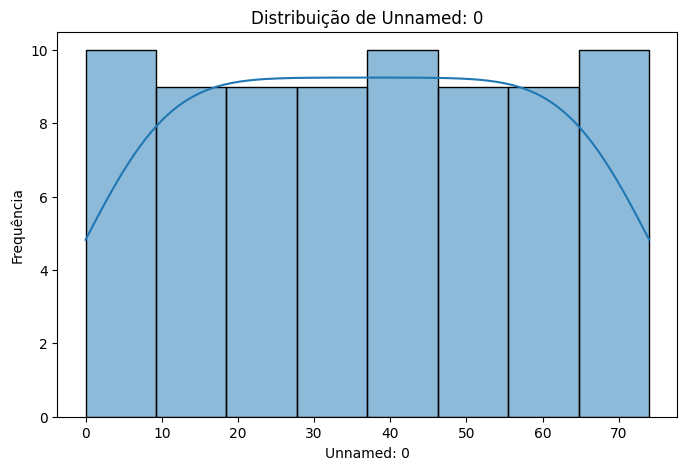

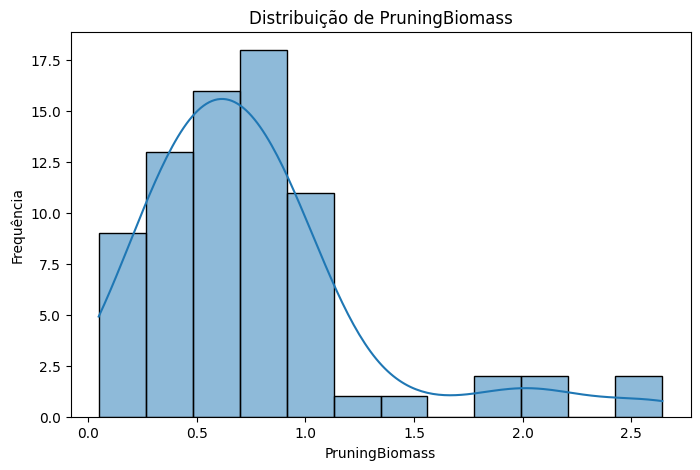

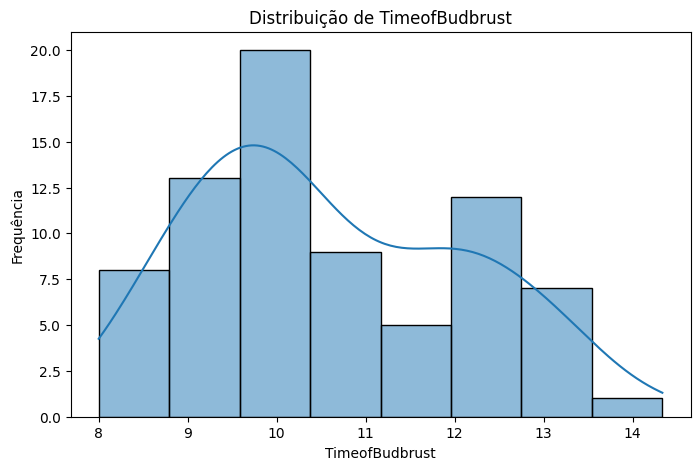

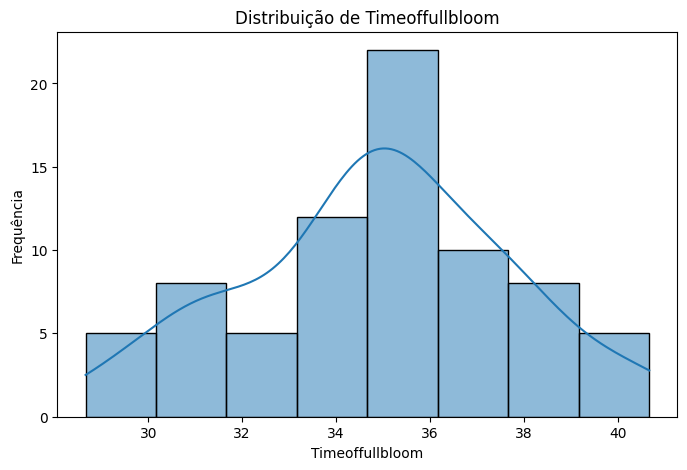

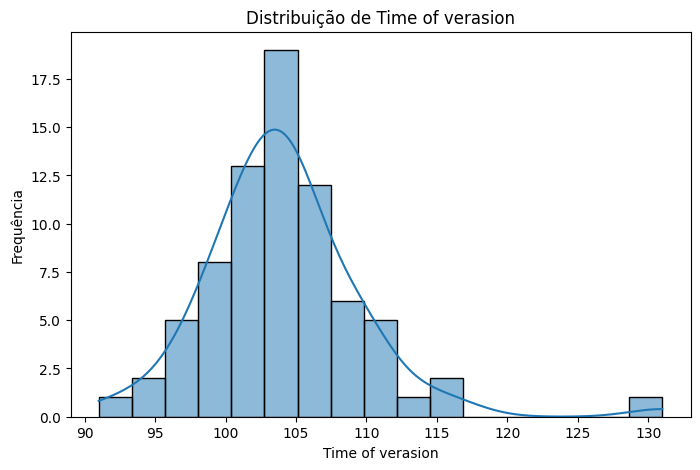

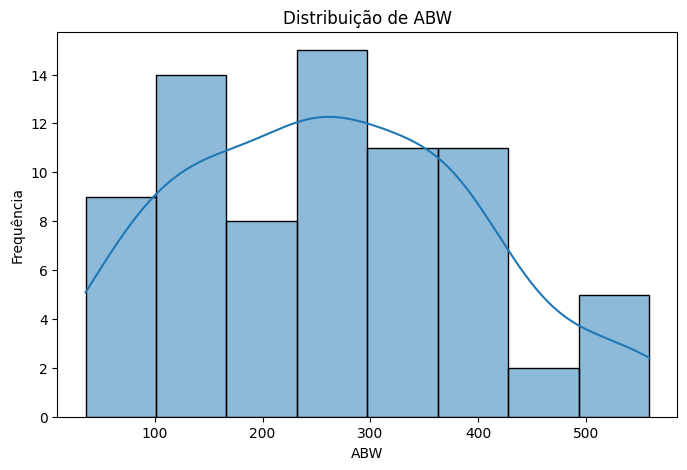

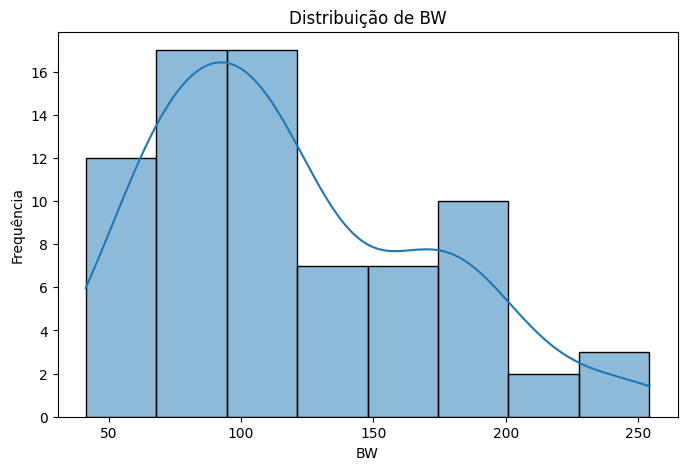

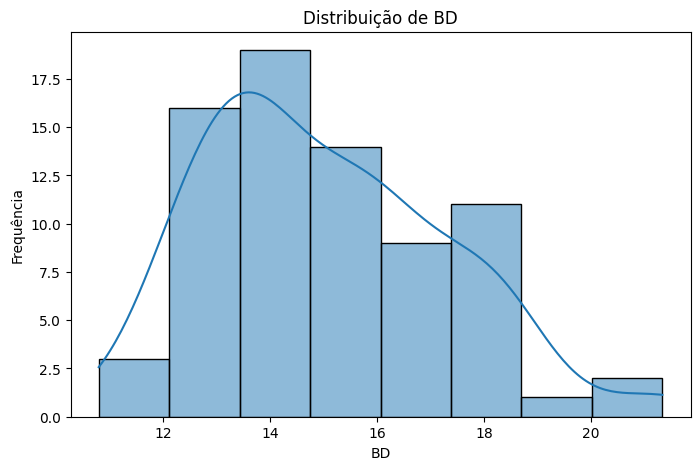

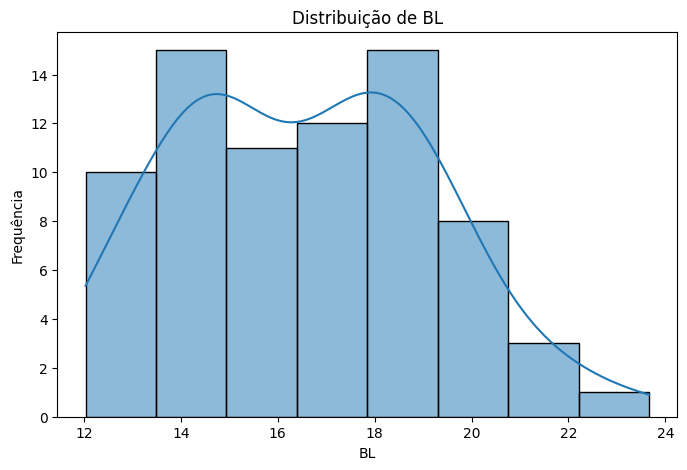

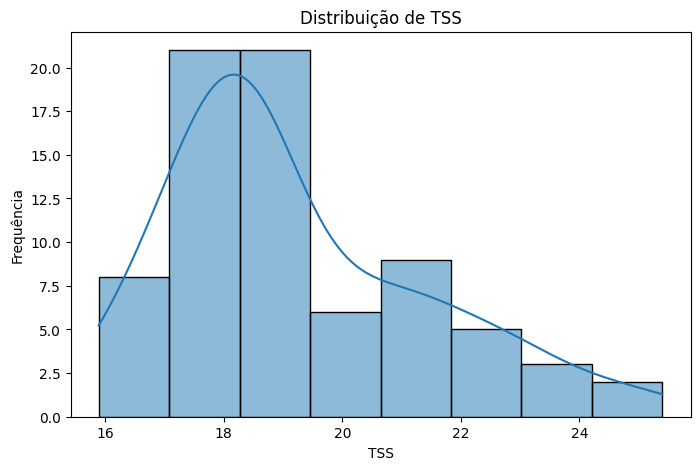

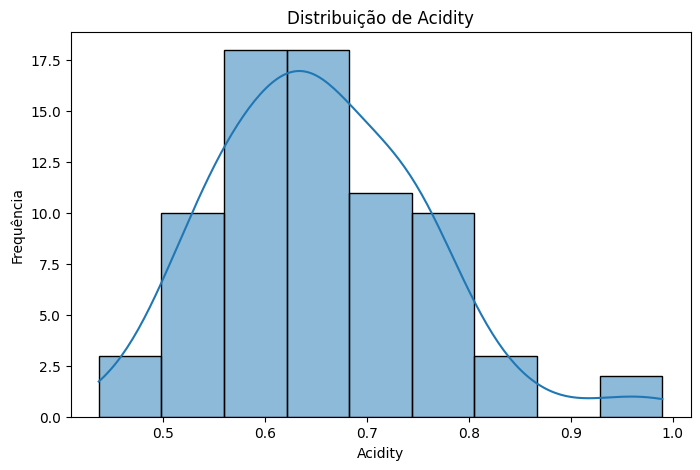

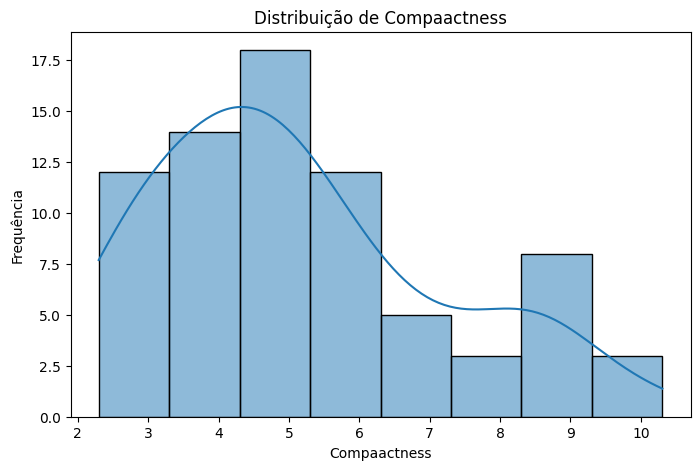

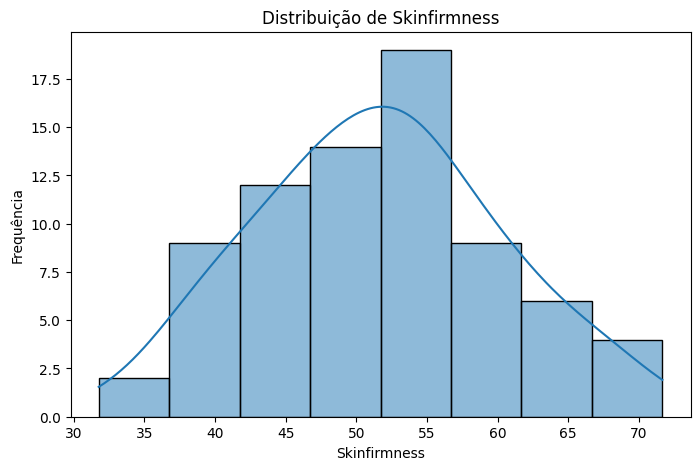

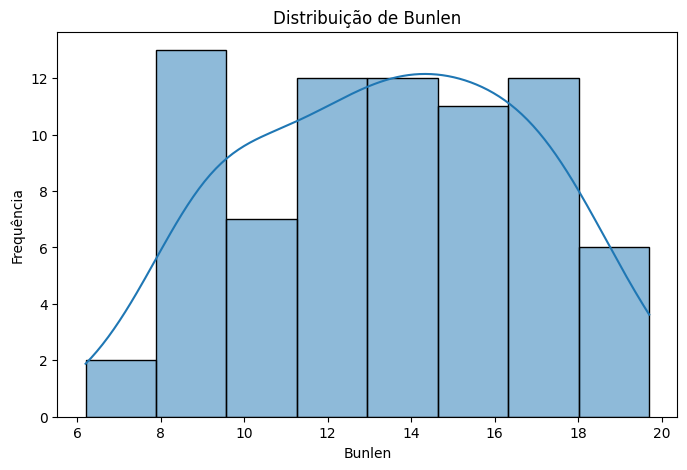

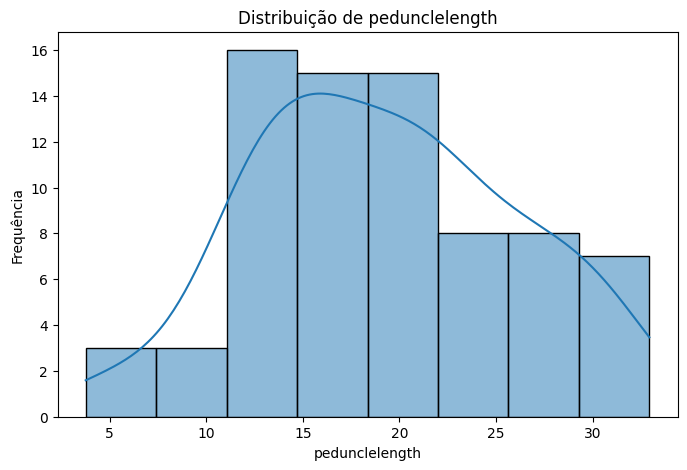

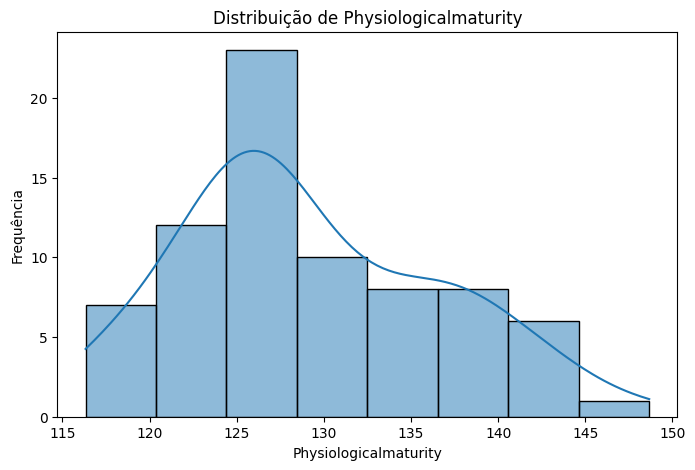

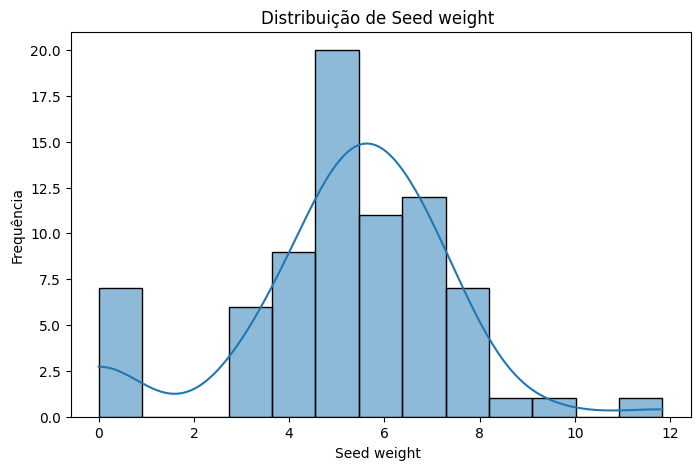

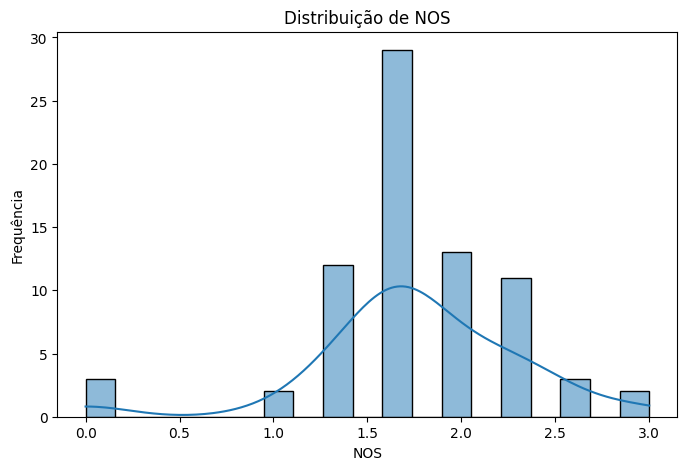

In [6]:
import seaborn as sns

# Visualizar distribuições
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()


**Observações**
***Boxplots:***

Identificamos outliers em várias variáveis, como Time of verasion, ABW, BW, e Seed weight.
Algumas variáveis, como TSS e Acidity, apresentam distribuições bem compactas com poucos outliers.

***Distribuições:***

Variáveis como PruningBiomass e Skinfirmness têm distribuições assimétricas.
Seed weight tem uma distribuição que sugere valores extremos na ponta direita (outliers positivos).

**Identificar Outliers**

Valores abaixo de Q1 - 1.5 * IQR ou acima de Q3 + 1.5 * IQR serão considerados outliers.

In [7]:
# Calcular os quartis e o IQR para ABW
Q1 = data['ABW'].quantile(0.25)
Q3 = data['ABW'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Limite inferior: {lower_bound}")
print(f"Limite superior: {upper_bound}")

# Identificar os outliers
outliers_abw = data[(data['ABW'] < lower_bound) | (data['ABW'] > upper_bound)]
print(f"Outliers identificados:\n{outliers_abw}")


Limite inferior: -158.01666666666662
Limite superior: 671.2633333333333
Outliers identificados:
Empty DataFrame
Columns: [Unnamed: 0, Genotypes, PruningBiomass, TimeofBudbrust, Timeoffullbloom, Time of verasion, ABW, BW, BD, BL, TSS, Acidity, Compaactness, Skinfirmness, Bunlen, pedunclelength, Physiologicalmaturity, Seed weight , NOS]
Index: []


**Visualizar Outliers**

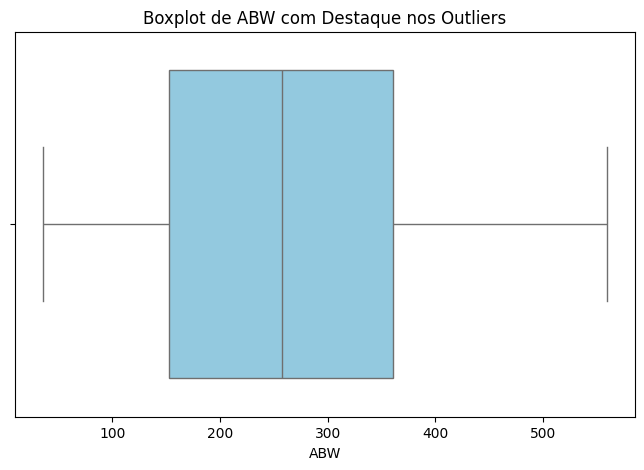

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para ABW com destaque nos outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data['ABW'], orient='h', color='skyblue')
plt.title('Boxplot de ABW com Destaque nos Outliers')
plt.xlabel('ABW')
plt.show()


**Análise**

***Limites Inferior e Superior:***

Limite inferior: -158.01
Limite superior: 671.26
Todos os valores de ABW estão dentro desses limites.

***Boxplot:***

Os dados estão bem distribuídos, sem valores extremos.

**Identificar Outliers em** ***BW***

In [9]:
# Calcular os quartis e o IQR para BW
Q1 = data['BW'].quantile(0.25)
Q3 = data['BW'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Limite inferior: {lower_bound}")
print(f"Limite superior: {upper_bound}")

# Identificar os outliers
outliers_bw = data[(data['BW'] < lower_bound) | (data['BW'] > upper_bound)]
print(f"Outliers identificados:\n{outliers_bw}")


Limite inferior: -39.94083333333329
Limite superior: 275.85249999999996
Outliers identificados:
Empty DataFrame
Columns: [Unnamed: 0, Genotypes, PruningBiomass, TimeofBudbrust, Timeoffullbloom, Time of verasion, ABW, BW, BD, BL, TSS, Acidity, Compaactness, Skinfirmness, Bunlen, pedunclelength, Physiologicalmaturity, Seed weight , NOS]
Index: []


**Visualizar Outliers**

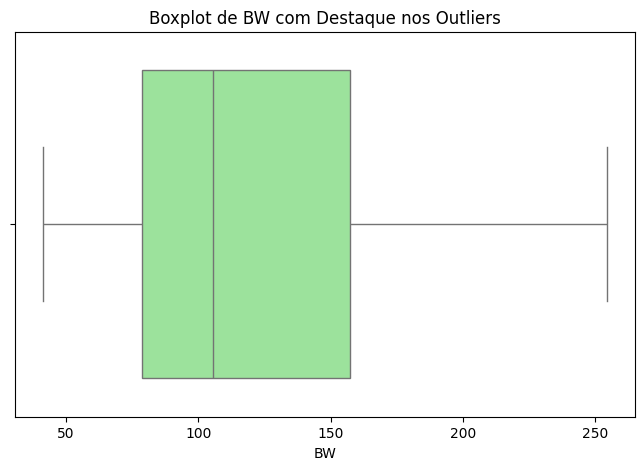

In [10]:
# Boxplot para BW com destaque nos outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data['BW'], orient='h', color='lightgreen')
plt.title('Boxplot de BW com Destaque nos Outliers')
plt.xlabel('BW')
plt.show()


Assim como ocorreu com a variável ABW, não identificamos outliers na variável BW (Bunch Weight) com base no método do intervalo interquartil (IQR). O boxplot também confirma que todos os valores estão dentro dos limites aceitáveis.

**Resumo**

**Limites Inferior e Superior:**

Limite inferior: -39.94

Limite superior: 275.85

Todos os valores de BW estão dentro desses limites.

**Boxplot:**

Os dados de BW estão distribuídos sem valores extremos.

**Identificar Outliers em Seed weight**

In [12]:
# Remover espaços extras dos nomes das colunas
data.columns = data.columns.str.strip()
print(data.columns)



Index(['Unnamed: 0', 'Genotypes', 'PruningBiomass', 'TimeofBudbrust',
       'Timeoffullbloom', 'Time of verasion', 'ABW', 'BW', 'BD', 'BL', 'TSS',
       'Acidity', 'Compaactness', 'Skinfirmness', 'Bunlen', 'pedunclelength',
       'Physiologicalmaturity', 'Seed weight', 'NOS'],
      dtype='object')


In [14]:
# Calcular os quartis e o IQR para Seed weight
Q1 = data['Seed weight'].quantile(0.25)  # Note o espaço extra
Q3 = data['Seed weight'].quantile(0.75)
IQR = Q3 - Q1

# Limites inferior e superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Limite inferior: {lower_bound}")
print(f"Limite superior: {upper_bound}")

# Identificar os outliers
outliers_seed_weight = data[(data['Seed weight'] < lower_bound) | (data['Seed weight'] > upper_bound)]
print(f"Outliers identificados:\n{outliers_seed_weight}")


Limite inferior: 1.355833333333334
Limite superior: 9.535833333333333
Outliers identificados:
    Unnamed: 0        Genotypes  PruningBiomass  TimeofBudbrust  \
1            1            Alden        2.137667       10.000000   
13          13  Beauty Seedless        0.495333        8.333333   
28          28   E29/3 (BC XTS)        0.892667        8.333333   
40          40   Manjari Medika        0.539667       11.000000   
41          41   Maroo Seedless        0.132667       10.000000   
42          42         Marquise        0.524333       14.333333   
43          43     Muscat Petit        1.025667       11.666667   
46          46   Pearl of Csaba        0.838333       10.000000   

    Timeoffullbloom  Time of verasion         ABW          BW         BD  \
1         35.333333        102.666667  262.866667  182.776667  15.523333   
13        37.333333         91.000000  399.800000   49.666667  12.266667   
28        40.666667        100.000000  355.700000  110.900000  12.966667  

**Visualizar Outliers**

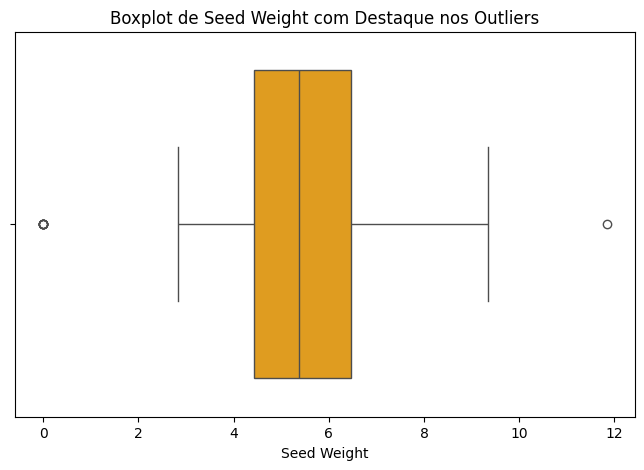

In [16]:
# Boxplot para Seed weight com destaque nos outliers
plt.figure(figsize=(8, 5))
sns.boxplot(data['Seed weight'], orient='h', color='orange')  # Note o espaço extra
plt.title('Boxplot de Seed Weight com Destaque nos Outliers')
plt.xlabel('Seed Weight')
plt.show()


**Resultados:**

***Limites calculados para Seed Weight:***

Limite inferior: 1.35

Limite superior: 9.55

***Outliers identificados:***

Temos alguns valores fora dos limites definidos.

Esses valores podem ser relevantes para análises futuras, ou podem ser tratados dependendo do contexto.

***Boxplot:***

O boxplot destaca visualmente os outliers, confirmando os valores que excedem os limites.

**Explorar os Outliers Identificados**

In [18]:
# Verificar as estatísticas descritivas dos outliers
outliers_seed_weight.describe()

# Comparar outliers com os não outliers
non_outliers_seed_weight = data[(data['Seed weight'] >= lower_bound) & (data['Seed weight'] <= upper_bound)]
print(f"Estatísticas dos não outliers:")
non_outliers_seed_weight.describe()


Estatísticas dos não outliers:


,Unnamed: 0,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,37.626866,0.753109,10.646766,34.786070,104.442786,260.319851,119.579950,15.200000,16.701443,19.140746,0.657164,4.879950,51.159403,13.100846,18.484378,130.044776,5.640995,1.855721
std,22.361924,0.514373,1.486053,2.735046,5.629225,139.721725,52.190766,2.279131,2.731135,2.192593,0.103920,1.993108,8.458817,3.282111,6.491177,7.345925,1.335652,0.431206
min,0.000000,0.048667,8.000000,28.666667,94.000000,35.660000,41.276667,10.800000,12.033333,15.890000,0.436667,2.296667,31.766667,6.200000,3.766667,116.333333,2.830000,1.000000
25%,18.500000,0.440833,9.333333,33.333333,101.333333,137.011667,78.481667,13.583333,14.505000,17.616667,0.583333,3.495000,46.083333,10.566667,13.400000,124.833333,4.838333,1.666667
50%,36.000000,0.683667,10.333333,35.000000,104.000000,248.573333,104.800000,15.100000,16.866667,18.440000,0.653333,4.470000,51.200000,13.166667,17.633333,128.000000,5.413333,1.666667
75%,57.500000,0.924833,12.000000,36.666667,106.000000,365.060000,162.846667,16.800000,18.683333,20.588333,0.721667,5.518333,55.833333,15.695000,21.983333,136.000000,6.478333,2.000000
max,74.000000,2.643667,13.333333,40.666667,131.000000,558.933333,254.250000,21.333333,23.666667,25.400000,0.990000,10.306667,71.666667,19.623333,32.933333,148.666667,9.343333,3.000000


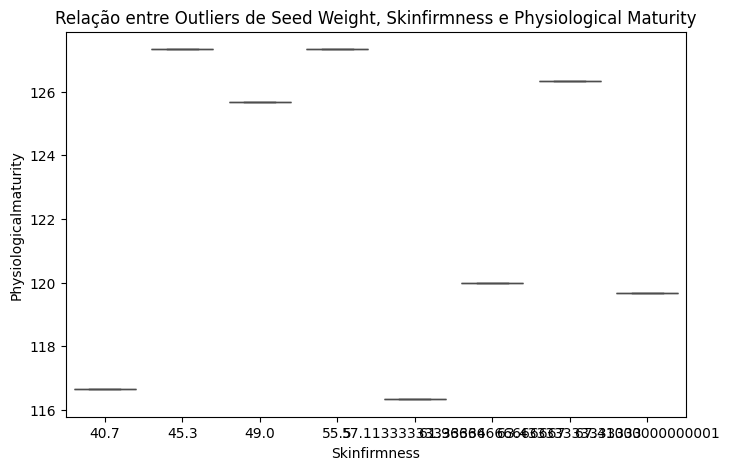

In [19]:
# Relação entre os outliers e outras variáveis
plt.figure(figsize=(8, 5))
sns.boxplot(data=outliers_seed_weight, x='Skinfirmness', y='Physiologicalmaturity', color='red')
plt.title('Relação entre Outliers de Seed Weight, Skinfirmness e Physiological Maturity')
plt.show()
